In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 15}
matplotlib.rc('font', **font)

Here we set up 3 linear multistep methods.

In [11]:
def leapfrog(f, k, unp1, un):
    return un + 2*k*f(unp1)

def adams_bashforth(f, k, unp1, un):
    return unp1 +  k/2*(3*f(unp1)-f(un))

def three_pt(f, k, unp2, unp1, un):
    return 3*unp2 - 2*unp1 + k*f(un)

# Zero stability demonstration

Now we test our methods on the problem

$$
  u'(t) = 0, \ \ \ \ u(0)=0.
$$

We take initial values
$$
U^0 = 0, \ \ \ \ \ \ \ \ U^1=k
$$
which converge to the correct values as $k \to 0$.

In [12]:
def f(u):
    return 0

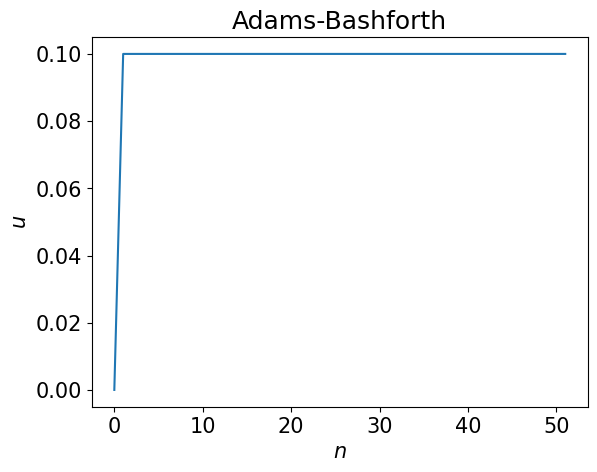

In [13]:
k = 0.1
uu = [0,k]
for i in range(50):
    uu.append(adams_bashforth(f,k,uu[-1],uu[-2]))
    
plt.plot(uu)
plt.title('Adams-Bashforth');
plt.xlabel('$n$'); plt.ylabel('$u$');

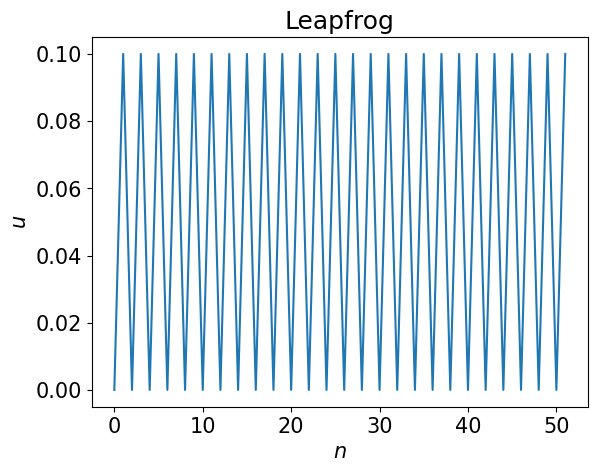

In [14]:
k = 0.1
uu = [0,k]
for i in range(50):
    uu.append(leapfrog(f,k,uu[-1],uu[-2]))

plt.plot(uu)
plt.title('Leapfrog');
plt.xlabel('$n$'); plt.ylabel('$u$');

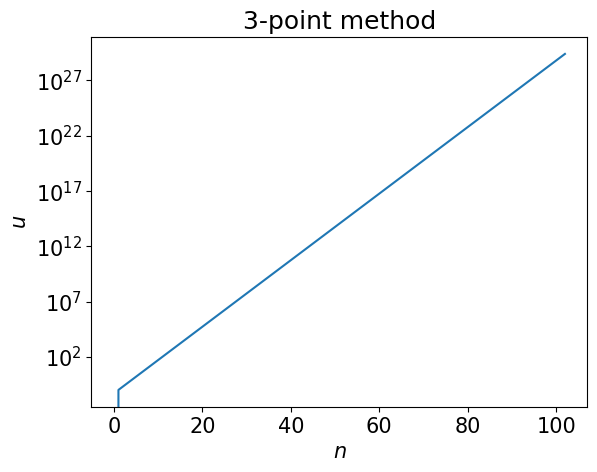

In [15]:
k = 0.1
uu = [0,k,2*k]
for i in range(100):
    uu.append(three_pt(f,k,uu[-1],uu[-2],uu[-3]))

plt.semilogy(uu)
plt.title('3-point method');
plt.xlabel('$n$'); plt.ylabel('$u$');

# Absolute stability demonstration

Next, let's test these methods on the problem

$$
    u'(t) = -u.
$$

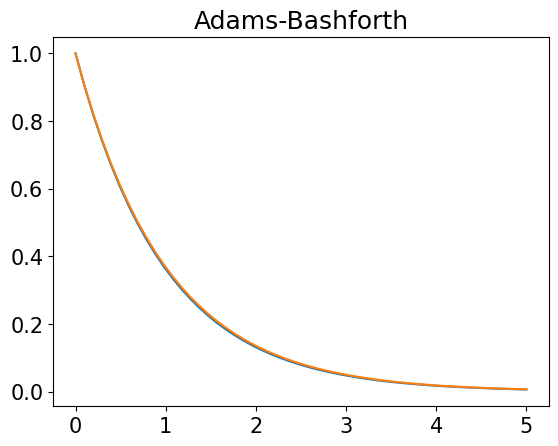

In [16]:
def g(u):
    return -u

k = 0.1
uu = [1.,np.exp(-k)]
N=50
for i in range(N):
    uu.append(adams_bashforth(g,k,uu[-1],uu[-2]))
    
t = np.linspace(0,k*N,N+2)    
plt.plot(t,uu)
plt.plot(t,np.exp(-t))
plt.title('Adams-Bashforth');

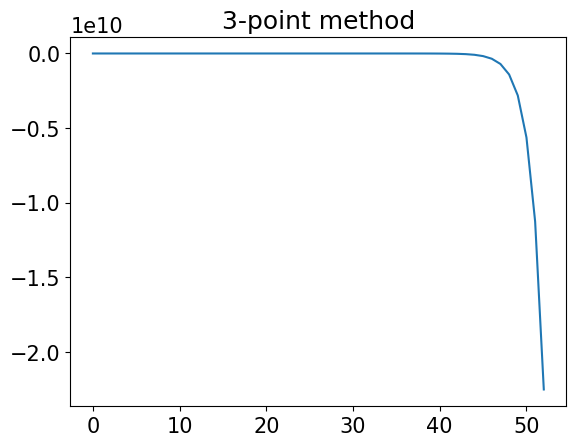

In [17]:
k = 1.e-5
uu = [1.,1.,1.]
for i in range(50):
    uu.append(three_pt(g,k,uu[-1],uu[-2],uu[-3]))

plt.plot(uu)
plt.title('3-point method');

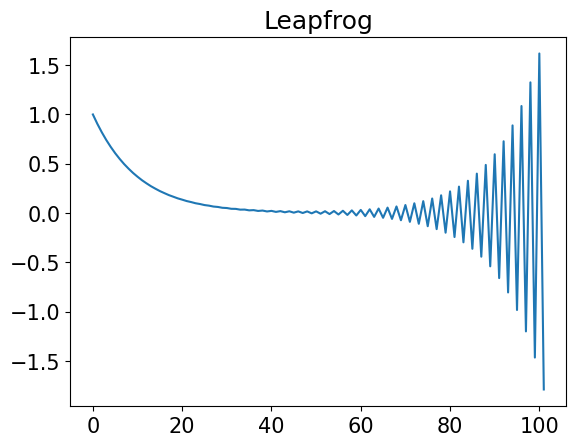

In [20]:
k = 0.1
uu = [1.,np.exp(-k)]
for i in range(100):
    uu.append(leapfrog(g,k,uu[-1],uu[-2]))
    
plt.plot(uu)
plt.title('Leapfrog');